#Student Name: Bianjiang Yang
#ECE 595 Machine Learning II
#Project 2: Autoencoders - Student Code

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Oct  8 04:09:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Import necessary packages
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K

#Part 0: Importing and Normalizing Data

In [ ]:
#Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

#Part 1: Deep Fully-Connected AutoEncoder

In [ ]:
#Reshape training and testing data into 784-dimensional vectors
data_train = data_train.reshape(60000,784)
data_test = data_test.reshape(10000,784)

#Part 1-1: Sigmoid + BCELoss

In [ ]:
#Create autoencoder architecture (BCE Loss)
def deep_ae():
    model = Sequential()

    # Encoder
    model.add(Dense(400, activation="relu", use_bias=True, kernel_initializer="uniform", input_dim=784))
    model.add(Dense(200, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(100, activation="relu", use_bias=True, kernel_initializer="uniform"))
    
    # Decoder
    model.add(Dense(200, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(400, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(784, activation="sigmoid", use_bias=True, kernel_initializer="uniform"))

    return model

#Create deep autoencoder graph
deep_ae = deep_ae()

#Compile model using an appropriate loss and optimizer algorithm
deep_ae.compile(loss="binary_crossentropy", optimizer="adam")#mean_squared_error

#Train the model and assign training meta-data to a variable
num_epochs=150
batch_size=1024
deep_ae_history = deep_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs,batch_size=batch_size, shuffle=True)


Epoch 1/150
59/59 [==============================] - 3s 10ms/step - loss: 0.3568 - val_loss: 0.2609
Epoch 2/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2571 - val_loss: 0.2531
Epoch 3/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2511 - val_loss: 0.2489
Epoch 4/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2404 - val_loss: 0.2307
Epoch 5/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2207 - val_loss: 0.2051
Epoch 6/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1955 - val_loss: 0.1812
Epoch 7/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1722 - val_loss: 0.1605
Epoch 8/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1550 - val_loss: 0.1482
Epoch 9/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1468 - val_loss: 0.1431
Epoch 10/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1420 - val_loss: 0.1394
Epoch 11

In [ ]:
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = deep_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl = get_hl([data_test])[0]

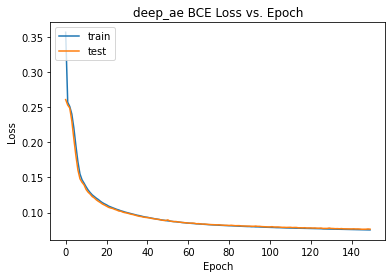

In [ ]:
#Plot loss vs epoch for BCE [Together or separate, Both accepted]
plt.plot (deep_ae_history.history [ 'loss' ] )
plt.plot (deep_ae_history.history [ 'val_loss' ] )
plt.title ('deep_ae BCE Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

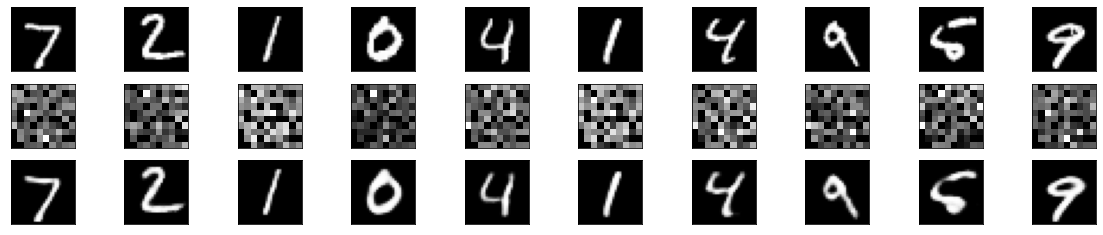

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions (Sigmoid+BCE)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Part 1-2: Sigmoid + MSE Loss

In [ ]:
#Create autoencoder architecture (MSE Loss)
def deep_ae():
    model = Sequential()

    # Encoder
    model.add(Dense(400, activation="relu", use_bias=True, kernel_initializer="uniform", input_dim=784))
    model.add(Dense(200, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(100, activation="relu", use_bias=True, kernel_initializer="uniform"))
    
    # Decoder
    model.add(Dense(200, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(400, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(784, activation="sigmoid", use_bias=True, kernel_initializer="uniform"))

    return model

#Create deep autoencoder graph
deep_ae = deep_ae()

#Compile model using an appropriate loss and optimizer algorithm
deep_ae.compile(loss="mean_squared_error", optimizer="adam")

#Train the model and assign training meta-data to a variable
num_epochs=150
batch_size=1024
deep_ae_history = deep_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs,batch_size=batch_size, shuffle=True)


Epoch 1/150
59/59 [==============================] - 1s 9ms/step - loss: 0.1094 - val_loss: 0.0729
Epoch 2/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0691 - val_loss: 0.0631
Epoch 3/150
59/59 [==============================] - 0s 5ms/step - loss: 0.0599 - val_loss: 0.0572
Epoch 4/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0549 - val_loss: 0.0512
Epoch 5/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0475 - val_loss: 0.0438
Epoch 6/150
59/59 [==============================] - 0s 5ms/step - loss: 0.0407 - val_loss: 0.0366
Epoch 7/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0340 - val_loss: 0.0316
Epoch 8/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0308 - val_loss: 0.0295
Epoch 9/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0285 - val_loss: 0.0270
Epoch 10/150
59/59 [==============================] - 0s 5ms/step - loss: 0.0266 - val_loss: 0.0256
Epoch 11/

In [ ]:
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = deep_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl = get_hl([data_test])[0]

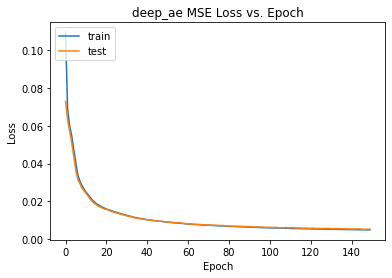

In [ ]:
#Plot loss vs epoch for MSE [Together or separate, Both accepted]
plt.plot (deep_ae_history.history [ 'loss' ] )
plt.plot (deep_ae_history.history [ 'val_loss' ] )
plt.title ('deep_ae MSE Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

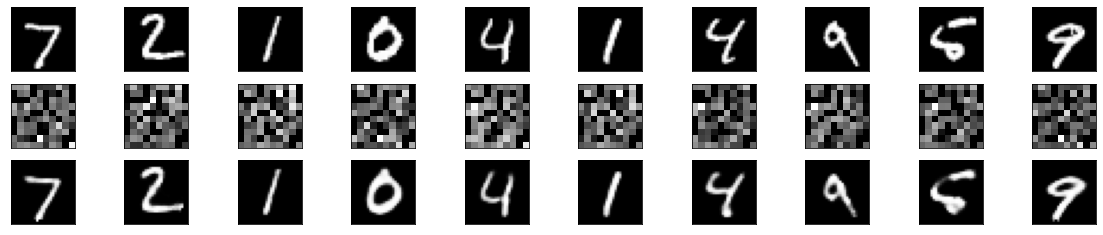

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions (Sigmoid+MSE)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Part1-3: Softmax + BCELoss

In [ ]:
#Create autoencoder architecture (BCE Loss)
def deep_ae():
    model = Sequential()

    # Encoder
    model.add(Dense(400, activation="relu", use_bias=True, kernel_initializer="uniform", input_dim=784))
    model.add(Dense(200, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(100, activation="relu", use_bias=True, kernel_initializer="uniform"))
    
    # Decoder
    model.add(Dense(200, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(400, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(784, activation="softmax", use_bias=True, kernel_initializer="uniform"))

    return model

#Create deep autoencoder graph
deep_ae = deep_ae()

#Compile model using an appropriate loss and optimizer algorithm
deep_ae.compile(loss="binary_crossentropy", optimizer="adam")#mean_squared_error

#Train the model and assign training meta-data to a variable
num_epochs=150
batch_size=1024
deep_ae_history = deep_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs,batch_size=batch_size, shuffle=True)


Epoch 1/150
59/59 [==============================] - 1s 8ms/step - loss: 0.3598 - val_loss: 0.2615
Epoch 2/150
59/59 [==============================] - 0s 5ms/step - loss: 0.2570 - val_loss: 0.2526
Epoch 3/150
59/59 [==============================] - 0s 5ms/step - loss: 0.2501 - val_loss: 0.2442
Epoch 4/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2362 - val_loss: 0.2272
Epoch 5/150
59/59 [==============================] - 0s 5ms/step - loss: 0.2083 - val_loss: 0.1905
Epoch 6/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1796 - val_loss: 0.1665
Epoch 7/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1585 - val_loss: 0.1516
Epoch 8/150
59/59 [==============================] - 0s 6ms/step - loss: 0.1488 - val_loss: 0.1434
Epoch 9/150
59/59 [==============================] - 0s 5ms/step - loss: 0.1409 - val_loss: 0.1361
Epoch 10/150
59/59 [==============================] - 0s 5ms/step - loss: 0.1355 - val_loss: 0.1317
Epoch 11/

In [ ]:
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = deep_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl = get_hl([data_test])[0]

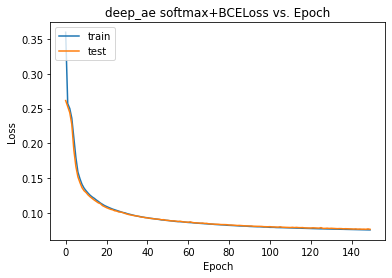

In [ ]:
#Plot loss vs epoch for BCE [Together or separate, Both accepted]
plt.plot (deep_ae_history.history [ 'loss' ] )
plt.plot (deep_ae_history.history [ 'val_loss' ] )
plt.title ('deep_ae softmax+BCELoss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

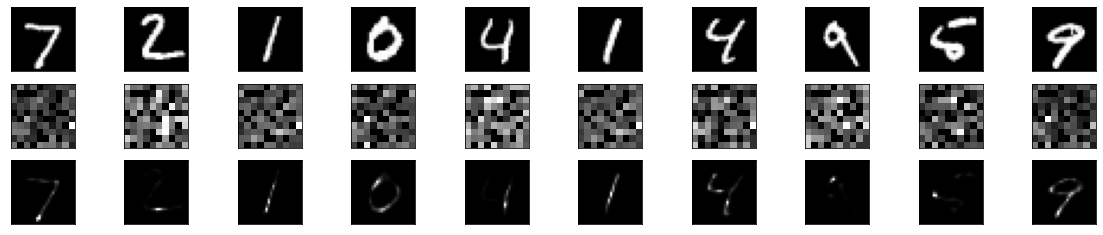

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions (Sigmoid+BCE)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Part1-4: Softmax + MSELoss

In [ ]:
#Create autoencoder architecture (MSE Loss)
def deep_ae():
    model = Sequential()

    # Encoder
    model.add(Dense(400, activation="relu", use_bias=True, kernel_initializer="uniform", input_dim=784))
    model.add(Dense(200, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(100, activation="relu", use_bias=True, kernel_initializer="uniform"))
    
    # Decoder
    model.add(Dense(200, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(400, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(784, activation="softmax", use_bias=True, kernel_initializer="uniform"))

    return model

#Create deep autoencoder graph
deep_ae = deep_ae()

#Compile model using an appropriate loss and optimizer algorithm
deep_ae.compile(loss="mean_squared_error", optimizer="adam")

#Train the model and assign training meta-data to a variable
num_epochs=150
batch_size=1024
deep_ae_history = deep_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs,batch_size=batch_size, shuffle=True)


Epoch 1/150
59/59 [==============================] - 1s 8ms/step - loss: 0.1117 - val_loss: 0.1136
Epoch 2/150
59/59 [==============================] - 0s 5ms/step - loss: 0.1115 - val_loss: 0.1128
Epoch 3/150
59/59 [==============================] - 0s 5ms/step - loss: 0.1108 - val_loss: 0.1126
Epoch 4/150
59/59 [==============================] - 0s 5ms/step - loss: 0.1106 - val_loss: 0.1124
Epoch 5/150
59/59 [==============================] - 0s 5ms/step - loss: 0.1105 - val_loss: 0.1124
Epoch 6/150
59/59 [==============================] - 0s 5ms/step - loss: 0.1104 - val_loss: 0.1122
Epoch 7/150
59/59 [==============================] - 0s 5ms/step - loss: 0.1102 - val_loss: 0.1121
Epoch 8/150
59/59 [==============================] - 0s 5ms/step - loss: 0.1101 - val_loss: 0.1120
Epoch 9/150
59/59 [==============================] - 0s 5ms/step - loss: 0.1100 - val_loss: 0.1119
Epoch 10/150
59/59 [==============================] - 0s 5ms/step - loss: 0.1100 - val_loss: 0.1119
Epoch 11/

In [ ]:
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = deep_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl = get_hl([data_test])[0]

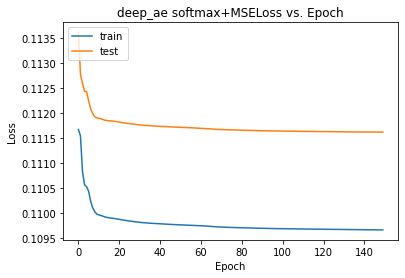

In [ ]:
#Plot loss vs epoch for MSE [Together or separate, Both accepted]
plt.plot (deep_ae_history.history [ 'loss' ] )
plt.plot (deep_ae_history.history [ 'val_loss' ] )
plt.title ('deep_ae softmax+MSELoss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

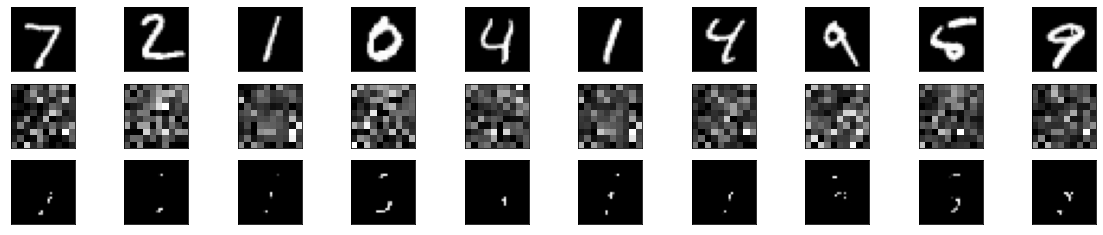

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions (Sigmoid+MSE)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Part I-5(Bonus): Linear Activation + BCE Loss

In [ ]:
#Create autoencoder architecture (BCE Loss)
def deep_ae():
    model = Sequential()

    # Encoder
    model.add(Dense(400, activation="relu", use_bias=True, kernel_initializer="uniform", input_dim=784))
    model.add(Dense(200, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(100, activation="relu", use_bias=True, kernel_initializer="uniform"))
    
    # Decoder
    model.add(Dense(200, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(400, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(784, activation=None, use_bias=True, kernel_initializer="uniform"))#Linear Activation

    return model

#Create deep autoencoder graph
deep_ae = deep_ae()

#Compile model using an appropriate loss and optimizer algorithm
deep_ae.compile(loss="binary_crossentropy", optimizer="adam")#mean_squared_error

#Train the model and assign training meta-data to a variable
num_epochs=150
batch_size=1024
deep_ae_history = deep_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs,batch_size=batch_size, shuffle=True)

Epoch 1/150
59/59 [==============================] - 1s 9ms/step - loss: 0.4776 - val_loss: 0.4085
Epoch 2/150
59/59 [==============================] - 0s 6ms/step - loss: 0.4032 - val_loss: 0.4029
Epoch 3/150
59/59 [==============================] - 0s 6ms/step - loss: 0.3941 - val_loss: 0.3721
Epoch 4/150
59/59 [==============================] - 0s 6ms/step - loss: 0.3659 - val_loss: 0.3525
Epoch 5/150
59/59 [==============================] - 0s 6ms/step - loss: 0.3375 - val_loss: 0.3265
Epoch 6/150
59/59 [==============================] - 0s 6ms/step - loss: 0.3137 - val_loss: 0.3043
Epoch 7/150
59/59 [==============================] - 0s 6ms/step - loss: 0.3132 - val_loss: 0.2875
Epoch 8/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2854 - val_loss: 0.2817
Epoch 9/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2745 - val_loss: 0.2658
Epoch 10/150
59/59 [==============================] - 0s 6ms/step - loss: 0.2684 - val_loss: 0.2601
Epoch 11/

In [ ]:
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = deep_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl = get_hl([data_test])[0]

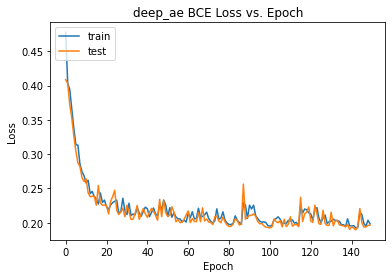

In [ ]:
#Plot loss vs epoch for BCE [Together or separate, Both accepted]
plt.plot (deep_ae_history.history [ 'loss' ] )
plt.plot (deep_ae_history.history [ 'val_loss' ] )
plt.title ('deep_ae BCE Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

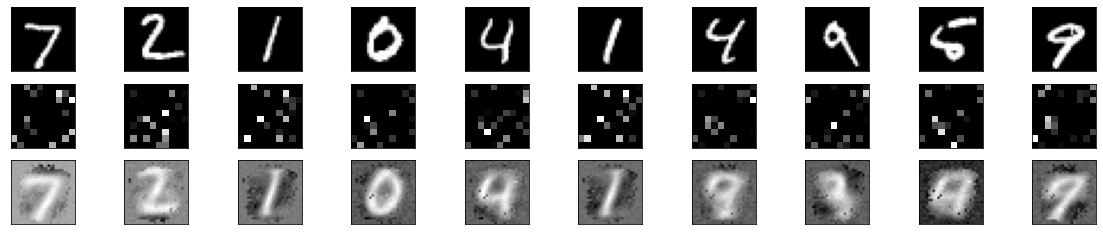

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions (Linear+BCE)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Part I-5(Bonus): Linear Activation + MSE Loss

In [ ]:
#Create autoencoder architecture (MSE Loss)
def deep_ae():
    model = Sequential()

    # Encoder
    model.add(Dense(400, activation="relu", use_bias=True, kernel_initializer="uniform", input_dim=784))
    model.add(Dense(200, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(100, activation="relu", use_bias=True, kernel_initializer="uniform"))
    
    # Decoder
    model.add(Dense(200, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(400, activation="relu", use_bias=True, kernel_initializer="uniform"))
    model.add(Dense(784, activation=None, use_bias=True, kernel_initializer="uniform"))#Linear Activation

    return model

#Create deep autoencoder graph
deep_ae = deep_ae()

#Compile model using an appropriate loss and optimizer algorithm
deep_ae.compile(loss="mean_squared_error", optimizer="adam")

#Train the model and assign training meta-data to a variable
num_epochs=150
batch_size=1024
deep_ae_history = deep_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs,batch_size=batch_size, shuffle=True)


Epoch 1/150
59/59 [==============================] - 1s 8ms/step - loss: 0.0706 - val_loss: 0.0635
Epoch 2/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0601 - val_loss: 0.0528
Epoch 3/150
59/59 [==============================] - 0s 5ms/step - loss: 0.0458 - val_loss: 0.0388
Epoch 4/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0350 - val_loss: 0.0316
Epoch 5/150
59/59 [==============================] - 0s 5ms/step - loss: 0.0301 - val_loss: 0.0278
Epoch 6/150
59/59 [==============================] - 0s 5ms/step - loss: 0.0269 - val_loss: 0.0254
Epoch 7/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0248 - val_loss: 0.0236
Epoch 8/150
59/59 [==============================] - 0s 5ms/step - loss: 0.0230 - val_loss: 0.0219
Epoch 9/150
59/59 [==============================] - 0s 6ms/step - loss: 0.0216 - val_loss: 0.0206
Epoch 10/150
59/59 [==============================] - 0s 5ms/step - loss: 0.0203 - val_loss: 0.0193
Epoch 11/

In [ ]:
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = deep_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl = get_hl([data_test])[0]

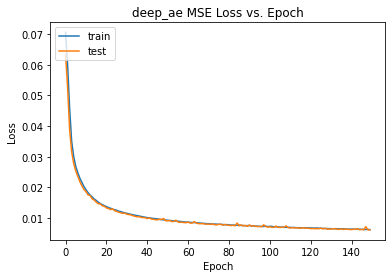

In [ ]:
#Plot loss vs epoch for MSE [Together or separate, Both accepted]
plt.plot (deep_ae_history.history [ 'loss' ] )
plt.plot (deep_ae_history.history [ 'val_loss' ] )
plt.title ('deep_ae MSE Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

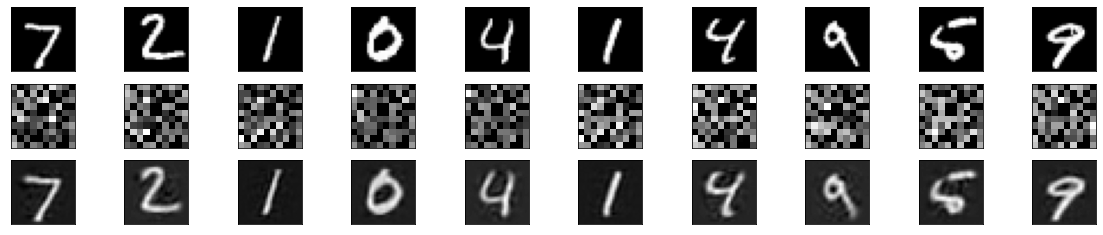

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions (Linear+MSE)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Answer the following questions: 

1.  Question 2c: BONUS [reasoning question]: Pair the output layer activation and loss function which performs better together. Linear, sigmoid, Binary cross entropy and Mean Square error
 
 Ans: Sigmoid activation function and BCELoss. 
 
 (1) Why Sigmoid: First, we need to constrain the output value to a specific range, like [0,1], [0,255] or [-1,1]. So linear activation function (or what we call no activation function) is not acceptable. For softmax, the sum of all the output values is equal to 1 and are constrained to [0,1], which means the images generated will be very dark. In this way, we can't represent all kinds of images but only some dark images. So only sigmoid is acceptable.
 
 (2) Why BCE Loss: Although Sigmoid can generate values between 0 and 1, it usually saturate at large input values. The graph of the sigmoid function indicates it's flat when |x| is large, which may cause gradient vanishing problem. MSE Loss can't deal with such problem. Assuming the sigmoid function is "phi(v)", the derivative of sigmoid is a form of "*phi(v)(1-phi(v))*". The BCE loss is "*C=-(yln(phi(v)+(1-y)(1-phi(v)))*". Its derivative w.r.t. *phi(v)* is *(phi(v)-y)/(phi(v)(1-phi(v)))* So we calculating the gradient, BCE Loss can avoid gradient vanishing problem.

2.  Question 5: Which loss function is better and why?

  Ans: The reconstructed samples of the model trained with BCELos look more clear.

3.  Question 6: If we were to predict pixels values [0 to 255] directly at the output of last layer. Should there be an activation function in last later?  If yes, which activation function and why?,  If No, reason why?
 
 Ans: Yes. Sigmoid activation function is okay. Because although sigmoid constrains the values to [0,1], we can later rescale the values to map them [0, 255]. However, if without such an activation function, the output value cannot be constrained to a specific range, which is not acceptable.


#Part 2: Deep Convolutional AutoEncoder

In [ ]:
#Reshape data into 2-D signals and account for grayscale channel in each image
data_train = data_train.reshape(60000,28,28,1)
data_test = data_test.reshape(10000,28,28,1)

#Part2-1: BCE+Sigmoid

In [ ]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()
    #Encoder
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    #Decoder
    model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(1,(3,3), activation='sigmoid', padding='same'))

    return model

#Create deep autoencoder graph
conv_ae = cae()

#Compile model using an appropriate loss and optimizer algorithm
conv_ae.compile(loss="binary_crossentropy", optimizer="adam")

#Train the model and assign training meta-data to a variable
num_epochs=150
batch_size=1024
conv_ae_history = conv_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs,batch_size=batch_size, shuffle=True)


Epoch 1/150
59/59 [==============================] - 18s 22ms/step - loss: 0.4214 - val_loss: 0.1900
Epoch 2/150
59/59 [==============================] - 1s 15ms/step - loss: 0.1518 - val_loss: 0.1288
Epoch 3/150
59/59 [==============================] - 1s 15ms/step - loss: 0.1179 - val_loss: 0.1068
Epoch 4/150
59/59 [==============================] - 1s 14ms/step - loss: 0.1028 - val_loss: 0.0975
Epoch 5/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0960 - val_loss: 0.0927
Epoch 6/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0920 - val_loss: 0.0893
Epoch 7/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0892 - val_loss: 0.0870
Epoch 8/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0872 - val_loss: 0.0854
Epoch 9/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0857 - val_loss: 0.0841
Epoch 10/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0844 - val_loss: 0.083

In [ ]:
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = conv_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl = get_hl([data_test])[0]

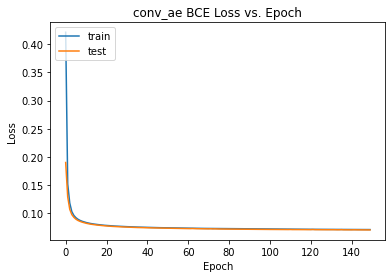

In [ ]:
#Plot loss vs epoch  for BCE[Together or separate, Both accepted]
plt.plot (conv_ae_history.history [ 'loss' ] )
plt.plot (conv_ae_history.history [ 'val_loss' ] )
plt.title ('conv_ae BCE Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

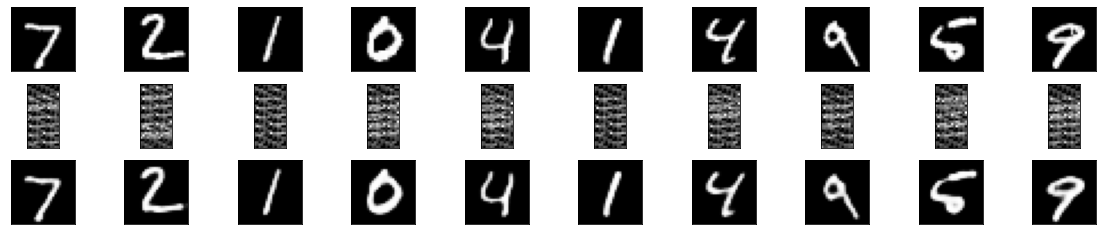

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions (Sigmoid+BCE)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i].reshape(28, 14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructions[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Part2-2: MSE + Sigmoid

In [ ]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()
    #Encoder
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    #Decoder
    model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(1,(3,3), activation='sigmoid', padding='same'))

    return model

#Create deep autoencoder graph
conv_ae = cae()

#Compile model using an appropriate loss and optimizer algorithm
conv_ae.compile(loss="mean_squared_error", optimizer="adam")

#Train the model and assign training meta-data to a variable
num_epochs=150
batch_size=1024
conv_ae_history = conv_ae.fit(data_train, data_train, validation_data=(data_test, data_test), epochs=num_epochs,batch_size=batch_size, shuffle=True)


Epoch 1/150
59/59 [==============================] - 2s 18ms/step - loss: 0.1420 - val_loss: 0.0651
Epoch 2/150
59/59 [==============================] - 1s 14ms/step - loss: 0.0439 - val_loss: 0.0269
Epoch 3/150
59/59 [==============================] - 1s 14ms/step - loss: 0.0228 - val_loss: 0.0188
Epoch 4/150
59/59 [==============================] - 1s 14ms/step - loss: 0.0166 - val_loss: 0.0141
Epoch 5/150
59/59 [==============================] - 1s 14ms/step - loss: 0.0132 - val_loss: 0.0118
Epoch 6/150
59/59 [==============================] - 1s 14ms/step - loss: 0.0113 - val_loss: 0.0103
Epoch 7/150
59/59 [==============================] - 1s 14ms/step - loss: 0.0101 - val_loss: 0.0094
Epoch 8/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 9/150
59/59 [==============================] - 1s 14ms/step - loss: 0.0087 - val_loss: 0.0082
Epoch 10/150
59/59 [==============================] - 1s 15ms/step - loss: 0.0082 - val_loss: 0.0078

In [ ]:
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = conv_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl = get_hl([data_test])[0]

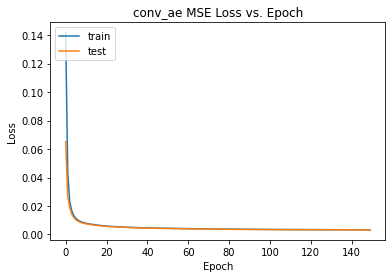

In [ ]:
#Plot loss vs epoch  for MSE [Together or separate, Both accepted]
plt.plot (conv_ae_history.history [ 'loss' ] )
plt.plot (conv_ae_history.history [ 'val_loss' ] )
plt.title ('conv_ae MSE Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

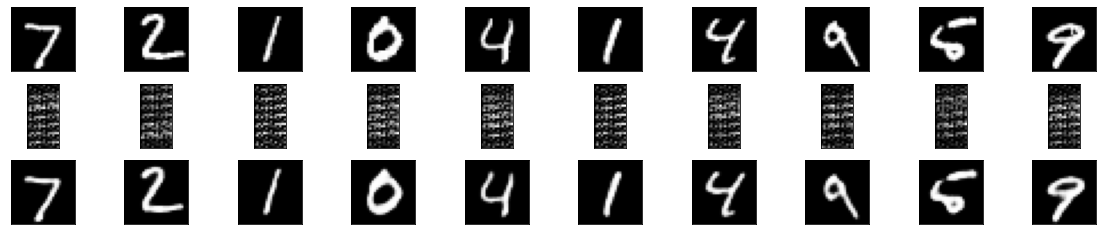

In [ ]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions (Sigmoid+MSE)
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i].reshape(28,14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructions[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Answer the following questions: 


1.  Question 4: Which loss function is better and why?

It's hard to tell which is better according to the qualitative resuls. But if we calculate the PSNR or SSIM, the test result of the BCELoss-model will be better. Theoretically, I have analysed why BCEloss is better than MSEloss when used with sigmoid activation function in Part1-question-2c.

#Part 3: Denoising AutoEncoder

In [ ]:
#Inject noise into testing data
noise_factor = 0.25
data_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
data_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)

#Clip to stay within valid (normalized) pixel range
data_train_noisy = np.clip(data_train_noisy, 0., 1.)
data_test_noisy = np.clip(data_test_noisy, 0., 1.)

#Reshape data to comply with input of denoising autoencoder
data_train_noisy = data_train_noisy.reshape(60000,28,28,1)
data_test_noisy = data_test_noisy.reshape(10000,28,28,1)
data_train = data_train.reshape(60000,28,28,1)
data_test = data_test.reshape(10000,28,28,1)

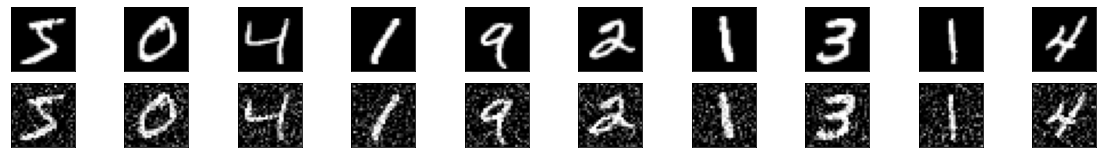

In [ ]:
#Show samples of 10 original images and their corrsponding noisy counterparts from the training set
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display noisy counterparts
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(data_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#Part3-1: BCE+Sigmoid

In [ ]:
#Create denoising autoencoder architecture
def dae():
    model = Sequential()
    #Encoder
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    #Decoder
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(1,(3,3), activation='sigmoid', padding='same'))

    return model
  
#Create deep autoencoder graph
conv_ae = dae()

#Compile model using an appropriate loss and optimizer algorithm
conv_ae.compile(loss="binary_crossentropy", optimizer="adam")

#Train the model and assign training meta-data to a variable
num_epochs=150
batch_size=256
conv_ae_history = conv_ae.fit(data_train_noisy, data_train, validation_data=(data_test_noisy, data_test), epochs=num_epochs,batch_size=batch_size, shuffle=True)


Epoch 1/150
235/235 [==============================] - 18s 9ms/step - loss: 0.1848 - val_loss: 0.0980
Epoch 2/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0926 - val_loss: 0.0874
Epoch 3/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0864 - val_loss: 0.0840
Epoch 4/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0839 - val_loss: 0.0822
Epoch 5/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0822 - val_loss: 0.0807
Epoch 6/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0809 - val_loss: 0.0798
Epoch 7/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0799 - val_loss: 0.0788
Epoch 8/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0793 - val_loss: 0.0783
Epoch 9/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0787 - val_loss: 0.0780
Epoch 10/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0782 - val_l

In [ ]:
#Generate denoised versions of noisy inputs
reconstructions = conv_ae.predict(data_test_noisy)

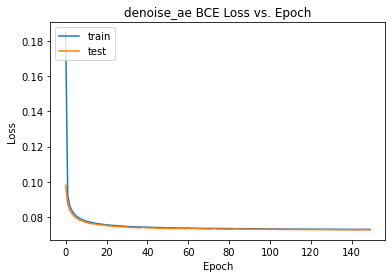

In [ ]:
#Plot loss vs epoch
plt.plot (conv_ae_history.history [ 'loss' ] )
plt.plot (conv_ae_history.history [ 'val_loss' ] )
plt.title ('denoise_ae BCE Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

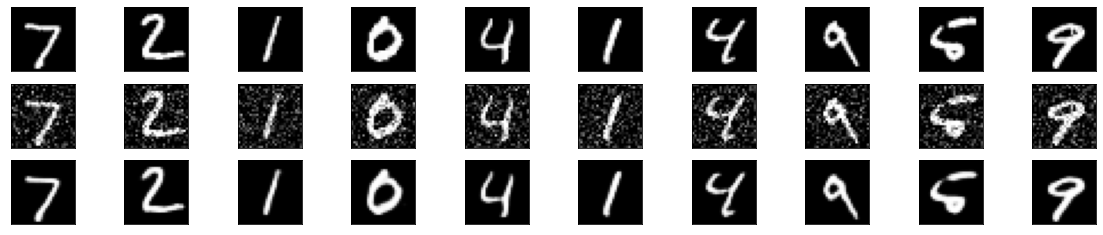

In [ ]:
#Show samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display noisy counterparts
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(data_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display de-noised images
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


#Part3-2: MSE+Linear

In [ ]:
#Create denoising autoencoder architecture
def dae_mse():
    model = Sequential()
    #Encoder
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    #Decoder
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(1,(3,3), activation=None, padding='same'))

    return model
  
#Create deep autoencoder graph
conv_ae_mse = dae_mse()

#Compile model using an appropriate loss and optimizer algorithm
conv_ae_mse.compile(loss="mean_squared_error", optimizer="adam")

#Train the model and assign training meta-data to a variable
num_epochs=150
batch_size=256
conv_ae_history = conv_ae_mse.fit(data_train_noisy, data_train, validation_data=(data_test_noisy, data_test), epochs=num_epochs,batch_size=batch_size, shuffle=True)


Epoch 1/150
235/235 [==============================] - 2s 8ms/step - loss: 0.0204 - val_loss: 0.0112
Epoch 2/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0102 - val_loss: 0.0091
Epoch 3/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0087 - val_loss: 0.0081
Epoch 4/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 5/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0075 - val_loss: 0.0071
Epoch 6/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0071 - val_loss: 0.0068
Epoch 7/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 8/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 9/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0064 - val_loss: 0.0062
Epoch 10/150
235/235 [==============================] - 2s 7ms/step - loss: 0.0063 - val_lo

In [ ]:
#Generate denoised versions of noisy inputs
reconstructions = conv_ae_mse.predict(data_test_noisy)

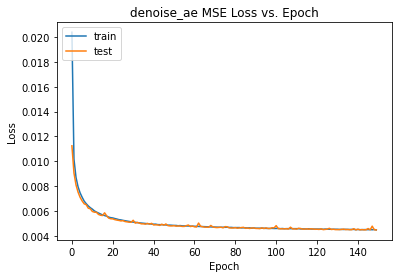

In [ ]:
#Plot loss vs epoch
plt.plot (conv_ae_history.history [ 'loss' ] )
plt.plot (conv_ae_history.history [ 'val_loss' ] )
plt.title ('denoise_ae MSE Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

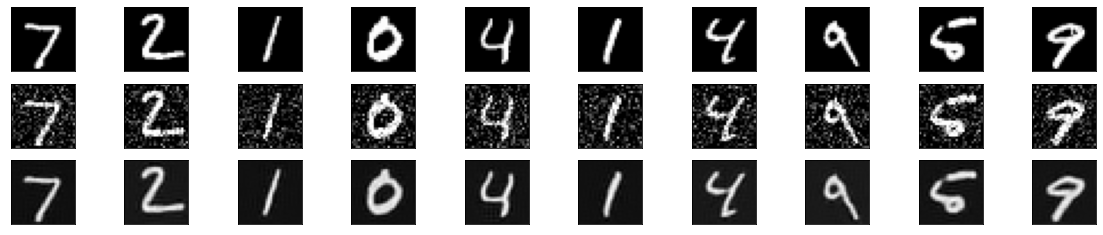

In [ ]:
#Show samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display noisy counterparts
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(data_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display de-noised images
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Part 3-3: MSE+Sigmoid(Not work, theoretically proved in part1-question2c)

In [ ]:
#Create denoising autoencoder architecture
def dae_mse():
    model = Sequential()
    #Encoder
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    #Decoder
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(1,(3,3), activation='sigmoid', padding='same'))

    return model
  
#Create deep autoencoder graph
conv_ae_mse = dae_mse()

#Compile model using an appropriate loss and optimizer algorithm
conv_ae_mse.compile(loss="mean_squared_error", optimizer="adam")

#Train the model and assign training meta-data to a variable
num_epochs=150
batch_size=256
conv_ae_history = conv_ae_mse.fit(data_train_noisy, data_train, validation_data=(data_test_noisy, data_test), epochs=num_epochs,batch_size=batch_size, shuffle=True)


Epoch 1/150
235/235 [==============================] - 2s 8ms/step - loss: 0.1145 - val_loss: 0.1140
Epoch 2/150
235/235 [==============================] - 2s 7ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 3/150
235/235 [==============================] - 2s 7ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/150
235/235 [==============================] - 2s 7ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 5/150
235/235 [==============================] - 2s 7ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 6/150
235/235 [==============================] - 2s 7ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 7/150
235/235 [==============================] - 2s 7ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 8/150
235/235 [==============================] - 2s 7ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 9/150
235/235 [==============================] - 2s 7ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 10/150
235/235 [==============================] - 2s 7ms/step - loss: 0.1120 - val_lo

In [ ]:
#Generate denoised versions of noisy inputs
reconstructions = conv_ae_mse.predict(data_test_noisy)

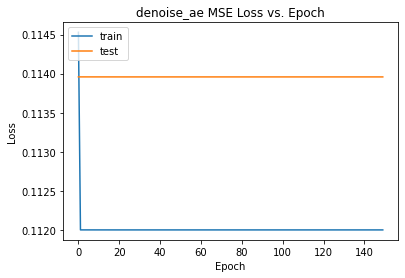

In [ ]:
#Plot loss vs epoch
plt.plot (conv_ae_history.history [ 'loss' ] )
plt.plot (conv_ae_history.history [ 'val_loss' ] )
plt.title ('denoise_ae MSE Loss vs. Epoch')
plt.ylabel ('Loss')
plt.xlabel ('Epoch')
plt.legend (['train' , 'test'] , loc='upper left')
plt.show()

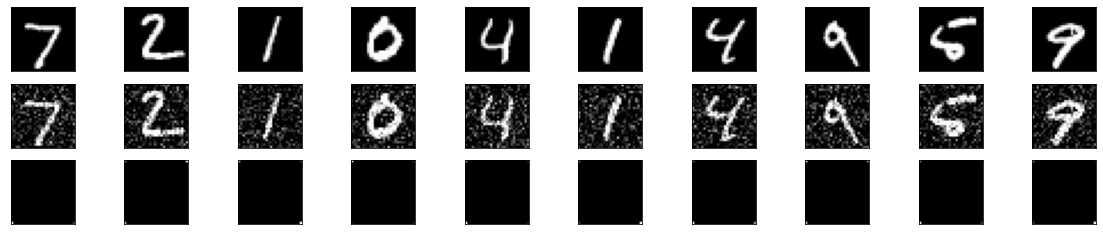

In [ ]:
#Show samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display noisy counterparts
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(data_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display de-noised images
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(reconstructions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()